# Implement-SGD-to-Linear-Regression

## About the dataset-

## Boston House Prices dataset

## Notes

Data Set Characteristics:

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None

:Creator: Harrison, D. and Rubinfeld, D.L.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression problems.

References

*    Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980.          244-261.
*    Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference      of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
*    many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

In [47]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston=load_boston() #loading data

In [4]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
pd_boston=pd.DataFrame(data=boston.data)
price=boston.target


In [6]:
# applying column standardization on pd_boston
s=StandardScaler()
train_data=s.fit_transform(pd_boston)


In [7]:
#preparing training data for manual sgd regressor
manual_train=pd.DataFrame(data=train_data)
manual_train['price']=price

In [8]:
manual_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7


# Experiment-1 ----SGDRegressor vs manual sgd 
    * fixing initial learning rate to 0.01, and making it constant and changing number of iteration


## Function for Sklearn sgd

In [9]:
#the functioning of this function is to use sklearn SGDRegressor and predict the price
#this function takes alpha, learning rate variation , initial learning rate(eta0), number of iteration , power_t, and all test and train data as an argument
#this function returns weight, intercept and mean squared error
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, train_data=train_data, train_y=price):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(train_data, train_y)
    y_pred=clf.predict(train_data)
    
    #scatter plot
    plt.scatter(train_y,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(train_y,y_pred)
    print('mean sq error=', sgd_error)
    print('number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error


## Manual fit SGD

In [10]:
# this function is a simple implementation of sgd to linear regression, here we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(price,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()

    
    manual_error=mean_squared_error(price,y_pred)
    print('error=',manual_error)
    
    return manual_error

# 1.1 SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='constant' 

In [11]:
b_diff=[]
w_num=[]

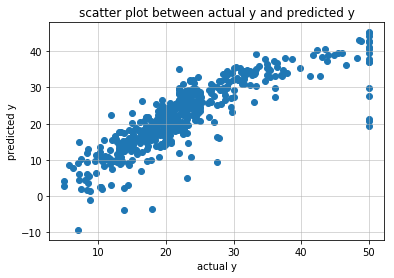

mean sq error= 26.179449696
number of iteration= 1


In [12]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

# 1.2 manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

In [13]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1)

In [14]:
y_pred=pred(train_data, w=w, b=b)

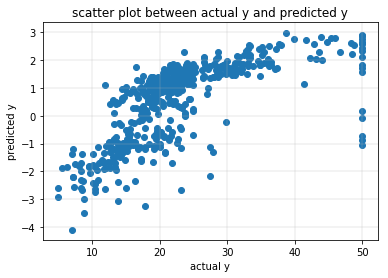

error= 553.277468652


In [15]:
manual_error=plot_(train_data,y_pred)

In [16]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.04193645  0.9259092  -0.60151698  0.24627826 -1.38552605  3.21574809
 -0.17893165 -2.33484244  0.30414643 -0.55096557 -2.12691528  1.0416264
 -3.63828278]
  
manual sgd weight---
 [[-0.20146304 -0.2140789  -0.24962453  0.02364131 -0.22726005  0.38171695
   0.01909267  0.02744143 -0.21336487 -0.29902849 -0.06792202  0.17177519
  -0.24774255]]


In [17]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.00771711]
manual sgd intercept= [ 0.5118]


# 1.3 SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

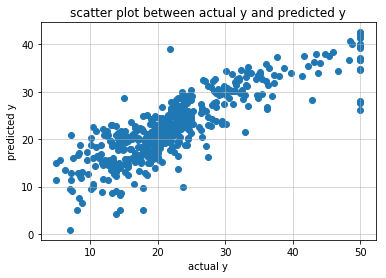

mean sq error= 24.867026608
number of iteration= 100


In [18]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

# 1.4 manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

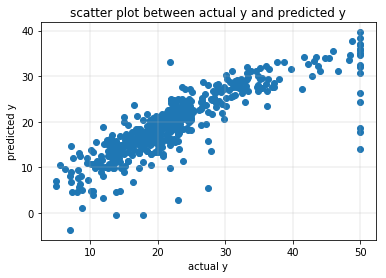

error= 34.63246662


In [19]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [20]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.33333369  1.24957436  0.29045795  0.5754579  -2.09887798  2.69308908
  0.30360912 -3.47650669  3.08727663 -1.7992147  -1.78218007  0.86722408
 -3.70690109]
  
manual sgd weight---
 [[-0.62672958  0.11077559 -0.93412972  0.62395143 -0.5198537   3.31474868
  -0.07987899 -1.23059256  0.2900815  -0.67067966 -1.62590911  0.84458634
  -1.99498773]]


In [21]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.65625724]
manual sgd intercept= [ 19.50893123]


# 1.5 SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'¶

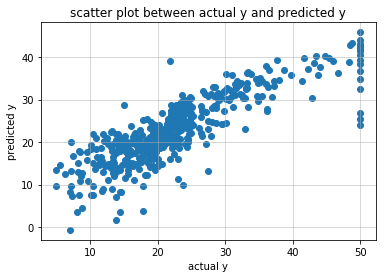

mean sq error= 23.8524392496
number of iteration= 1000


In [22]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

# 1.6 manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

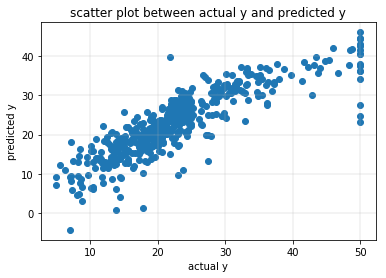

error= 22.2568792137


In [23]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [24]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.37347351  1.10213452  0.16771166  0.16990924 -2.00711127  3.31343029
  0.27128328 -3.31212844  2.99350835 -1.99572006 -2.13187433  0.62436948
 -3.6536665 ]
  
manual sgd weight---
 [[-0.79956318  0.80333868 -0.10307532  1.11153636 -2.00538275  2.88809911
   0.07145884 -3.08610286  2.01914532 -1.35022739 -2.22087389  0.9781811
  -3.63298663]]


In [25]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.76087539]
manual sgd intercept= [ 22.62808314]


# 1.7 SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

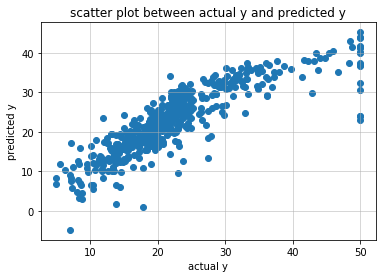

mean sq error= 23.4143151801
number of iteration= 10000


In [26]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

# 1.8 manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

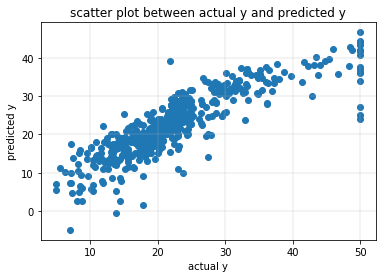

error= 22.2034590342


In [27]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [28]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.85123506  1.13509117  0.135872    0.49150008 -2.45282332  2.46629772
  0.32897964 -3.056609    2.15212432 -2.42261585 -2.18815623  1.28488075
 -3.42821512]
  
manual sgd weight---
 [[-1.02896506  1.16951568 -0.11205974  0.95420021 -2.05422243  2.78853794
   0.20583497 -3.13276276  2.82553006 -2.07476135 -2.19025815  0.60852823
  -3.94906354]]


In [29]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.97054441]
manual sgd intercept= [ 22.60583657]


## Performance Table

|sno|algo|alpha|learing rate variation|initial learning rate|power|iteration|error|
|-------|-------|-------|-------------------|---------------|-----------|-------------|
|1|SGDRegressor|0.0001|constant	|0.01|0.25|1|26.17|
|2|manual sgd|0.0001|constant	|0.01|0.25|1|553.27|
|3|SGDRegressor|0.0001|constant	|0.01|0.25|100|24.86|
|4|manual sgd|0.0001|constant	|0.01|0.25|100|34.63|
|5|SGDRegressor|0.0001|constant	|0.01|0.25|1000|23.85|
|6|manual sgd|0.0001|constant	|0.01|0.25|1000|22.25|
|7|SGDRegressor|0.0001|constant	|0.01|0.25|10000|23.41|
|8|manual sgd|0.0001|constant|0.01|0.25|10000|22.20|

# Observation-
* we have fixed learning rate and learing rate variation, and only changing n_iter
* by increasing manual sgd n_iter , error reducing.
* with increase in iteration the number of element manual sgd weight and SGDRegressor weight is going to be more similar
* with increasing the iteration number the intercept value also coming closer

# Experiment 2-- using 'optimal' learning rate
* using optimal learning rate variation and changing the n_iter

In [30]:
b1_diff=[]
w1_num=[]

# 2.1 SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling' 

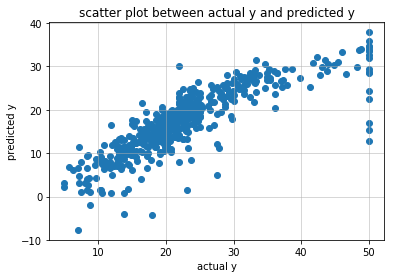

mean sq error= 54.6691726669
number of iteration= 1


In [31]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1)

# 2.2 manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

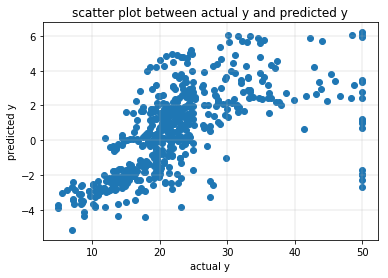

error= 546.720661564


In [32]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [33]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.71264913  0.63312564 -0.51133703  0.73879893 -0.53206832  2.90019056
 -0.33742146 -1.04017847 -0.07667967 -0.22507116 -1.70342289  0.88075947
 -2.520383  ]
  
manual sgd weight---
 [[-0.16069914  0.54695683 -0.35292846 -0.13826199 -0.25075892  0.37515115
  -0.23819644  0.30830627 -0.2308702  -0.268367   -0.33415244  0.16171533
  -0.26543443]]


In [34]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 17.12430423]
manual sgd intercept= [ 0.5072]


# 2.3 SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

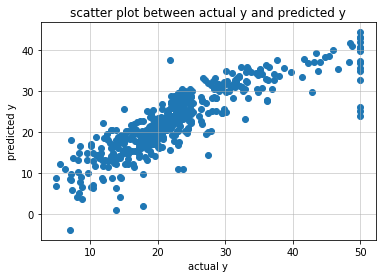

mean sq error= 21.938907682
number of iteration= 100


In [35]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=100)

# 2.4 manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

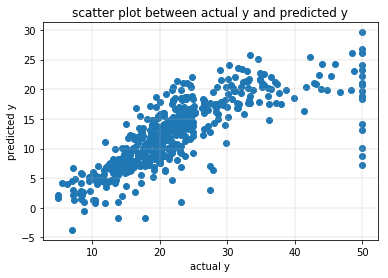

error= 134.278310677


In [36]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=100)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [37]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.88566604  1.04986857  0.12301277  0.68334052 -2.02555836  2.66763214
  0.04225275 -3.13950726  2.55888892 -1.91189512 -2.04942101  0.83870977
 -3.71799273]
  
manual sgd weight---
 [[-0.39328984  0.91785014 -0.61991611  0.53309111 -0.43769545  1.6026394
  -0.48692499 -0.02819226 -0.32611141 -0.26518588 -1.443348    0.51764282
  -1.30316736]]


In [38]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.53159473]
manual sgd intercept= [ 12.59285859]


# 2.5 SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

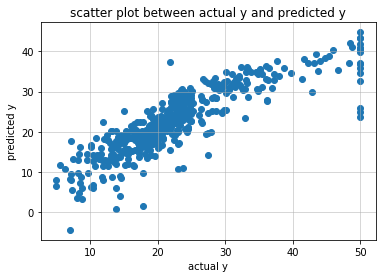

mean sq error= 21.8995980475
number of iteration= 1000


In [39]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1000)

# 2.6 manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

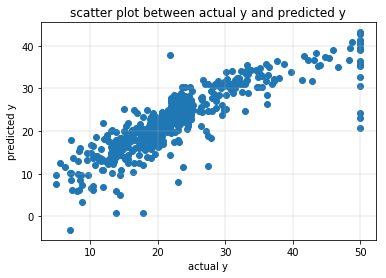

error= 22.9691607454


In [40]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1000)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [41]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.92824681  1.08752856  0.13671328  0.6866486  -2.06845529  2.66930905
  0.01758167 -3.09909049  2.65313137 -2.08477573 -2.06406236  0.85522892
 -3.75069114]
  
manual sgd weight---
 [[-0.67885321  0.57040518 -0.526446    0.678973   -0.80249321  3.05204702
  -0.25029234 -2.1317906   0.96382801 -0.60084572 -1.83252248  0.92192815
  -3.18256242]]


In [42]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.52838651]
manual sgd intercept= [ 22.27678728]


# 2.7 SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

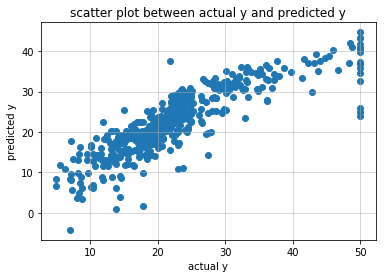

mean sq error= 21.897887273
number of iteration= 10000


In [43]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=10000)

# 2.8 manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

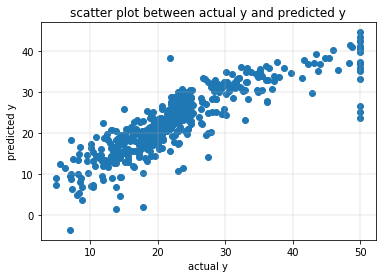

error= 22.0051778532


In [44]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=10000)
y_pred=pred(train_data, w=w, b=b)
manual_error=plot_(train_data,y_pred)

In [45]:
print('sklearn sgd weight---\n',w_sgd)
print("  ")
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.91757436  1.08211748  0.14352251  0.68205794 -2.0616043   2.66935884
  0.02213584 -3.10604651  2.66108779 -2.07415605 -2.06152067  0.85471155
 -3.74597373]
  
manual sgd weight---
 [[-0.8569477   0.98088986  0.04345806  0.79582368 -1.9557507   2.73526927
  -0.0279453  -3.14802287  2.24853757 -1.59153373 -2.04286704  0.92778632
  -3.61129289]]


In [46]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)

sklearn sgd intercept= [ 22.5329152]
manual sgd intercept= [ 22.5963735]


## Performance Table 

|sno|algo|alpha|learing_rate_variation|initial learning rate|power|iteration|error|
|-------|-------|-------|-------------------|---------------|-----------|-------------|
|1|SGDRegressor|0.0001|invscaling	|0.01|0.25|1|54.66|
|2|manual sgd|0.0001|invscaling	|0.01|0.25|1|546.72|
|3|SGDRegressor|0.0001|invscaling	|0.01|0.25|100|21.93|
|4|manual sgd|0.0001|invscaling	|0.01|0.25|100|134.27|
|5|SGDRegressor|0.0001|invscaling	|0.01|0.25|1000|21.89|
|6|manual sgd|0.0001|invscaling	|0.01|0.25|1000|22.96|
|7|SGDRegressor|0.0001|invscaling	|0.01|0.25|10000|21.89|
|8|manual sgd|0.0001|invscaling|0.01|0.25|10000|21.00|

# Observation-
* by increasing iteration number, weights of SGDRegressor and manual sgd becomes more similar
* with increasing in n_iter, the difference in intercepts of SGDRegressor and manual sgd becomes lesser

# Conclusion-
* we have taken boston house price dataset
* we prepared the data for training as boston data and testing as price
* we used column standardization
* we have SGDRegressor and manual sgd regressor implemented
* we didn't use any regularization term
* we have taken 'constant' and 'invscaling' learning rate variation in SGDRegressor and the same in manual sgd regressor
* in both 'constant' and 'invscaling' implementation we have seen that with higher number of iteration , manual sgd seems * similar to SGDRegressor
* in manual sgd regressor , error reduces with increasing in iteration number